<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Raster-visualization-basics" data-toc-modified-id="Raster-visualization-basics-1">Raster visualization basics</a></span><ul class="toc-item"><li><span><a href="#Adding-imagery-layer-onto-a-map" data-toc-modified-id="Adding-imagery-layer-onto-a-map-1.1">Adding imagery layer onto a map</a></span></li></ul></li><li><span><a href="#Raster-functions" data-toc-modified-id="Raster-functions-2">Raster functions</a></span><ul class="toc-item"><li><span><a href="#Using-raster-functions-associated-with-imagery-layer" data-toc-modified-id="Using-raster-functions-associated-with-imagery-layer-2.1">Using raster functions associated with imagery layer</a></span></li><li><span><a href="#Using-built-in-raster-functions-in-Python-API" data-toc-modified-id="Using-built-in-raster-functions-in-Python-API-2.2">Using built-in raster functions in Python API</a></span></li><li><span><a href="#Chaining-raster-functions" data-toc-modified-id="Chaining-raster-functions-2.3">Chaining raster functions</a></span></li><li><span><a href="#Visualize-the-workflow-using-draw_graph" data-toc-modified-id="Visualize-the-workflow-using-draw_graph-2.4">Visualize the workflow using <code>draw_graph</code></a></span></li><li><span><a href="#Saving-your-results" data-toc-modified-id="Saving-your-results-2.5">Saving your results</a></span></li></ul></li></ul></div>

## Raster visualization basics

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri_livingatlas>
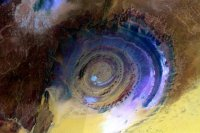

In [1]:
import arcgis
from arcgis.gis import GIS
from IPython.display import display

# gis = GIS() # ArcGIS online or enterprise
gis = GIS("https://pythonapi.playground.esri.com/portal", "arcgis_python", "amazing_arcgis_123")

# search for an ImageryLayer item
items = gis.content.search("title: Multispectral Landsat", item_type="Imagery Layer")
items[0]

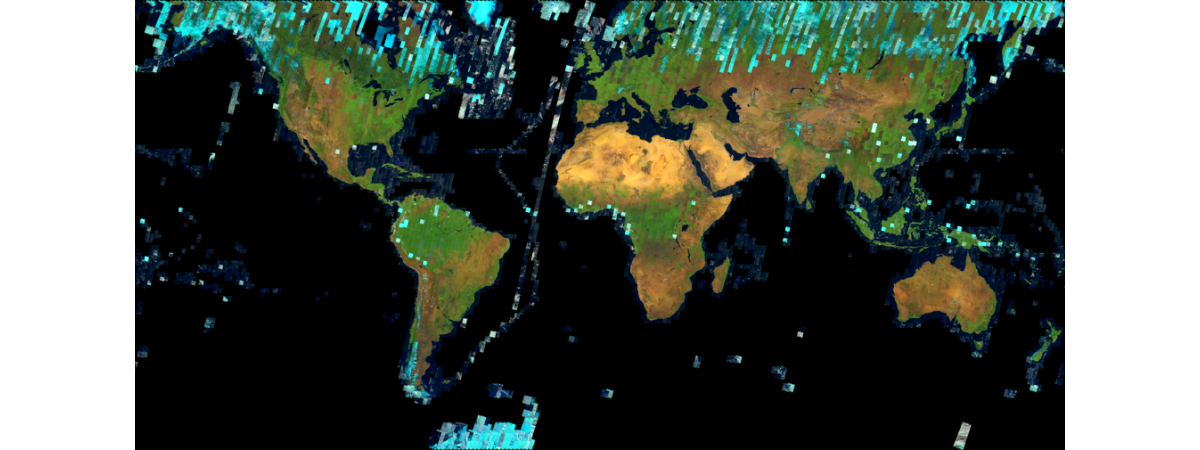

In [2]:
l8_lyr = items[0].layers[0] # convert item into an ImageryLayer
l8_lyr  # get the a screenshot for you to quickly look at how it looks

### Adding imagery layer onto a map

In [3]:
l8_map = gis.map('Redlands, CA') # create a map with its center at Redlands
l8_map.add_layer(l8_lyr) # you can zoom in to any extent of your choice
l8_map

MapView(layout=Layout(height='400px', width='100%'))

## Raster functions
Essentially algorithms you'd like to apply to your raster data.

### Using raster functions associated with imagery layer
Two types of raster functions. The 1st type is the raster functions published with your data.

In [4]:
for fn in l8_lyr.properties.rasterFunctionInfos: # what raster functions l8_lyr has
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
None


In [5]:
#Let's try applying the "color infrared", which is a commanly used band combination to highlight vegetation.
from arcgis.raster.functions import apply

infrared_map = gis.map('Redlands, CA')
infrared_lr = apply(l8_lyr, "Color Infrared") # on-the-fly
infrared_map.add_layer(infrared_lr)

infrared_map

MapView(layout=Layout(height='400px', width='100%'))

### Using built-in raster functions in Python API
For instance, if you want to create a NDVI image, you can just call `ndvi()` directly. NDVI = ((NIR - Red)/(NIR + Red))

In [6]:
from arcgis.raster.functions import *

ndvi_map = gis.map('Redlands, CA')

ndvi_lr = ndvi(l8_lyr, '5 4')
ndvi_map.add_layer(ndvi_lr)

ndvi_map

MapView(layout=Layout(height='400px', width='100%'))

### Chaining raster functions

Raster functions become more powerful if you can chain them together and apply them to huge dataset.
It's hard to tell which area has high NDVI. So let's reclassify it using `remap` and display big increase with green using `colormap`

In [7]:
enhanced_ndvi = colormap(remap(ndvi_lr, # reclassify pixels whose value is greater than 0.3 to 1, and the rest to no_data
                               input_ranges=[0.3, 1], 
                               output_values=[1], 
                               no_data_ranges=[-1, 0.3], astype='u8'), 
                        colormap=[[1, 124, 252, 0]], astype='u8')

In [8]:
ndvi_map = gis.map('Redlands, CA')
ndvi_map.add_layer(enhanced_ndvi) # high ndvi area becomes more visible
ndvi_map

MapView(layout=Layout(height='400px', width='100%'))

### Visualize the workflow using `draw_graph`

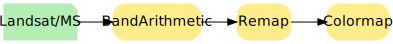

In [9]:
# helps verify and present your workflow. Becomes more useful when you perform more complicated analysis.
enhanced_ndvi.draw_graph()

### Saving your results

In [10]:
lyr = enhanced_ndvi.save('Test_viz_layer3', for_viz=True)
lyr

<Item title:"Test_viz_layer3" type:Imagery Layer owner:arcgis_python>